In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 8

In [12]:
X = torch.FloatTensor([[0,0,0],[0,1,1],[1,1,1],[1,0,1],[0,0,1],[0,1,0]])
Y = torch.FloatTensor([[1],[0],[1],[0],[1],[0]]) # cross entropy를 위해 0으로 변경

In [14]:
linear = nn.Linear(3,1,bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear,sigmoid)
criterion = nn.BCELoss() # Binary Cross Entropy
optimizier = torch.optim.SGD(model.parameters(),lr = 0.5)

0 0.7292872071266174
1000 0.6365141272544861
2000 0.6365141868591309
3000 0.6365141868591309
4000 0.6365141868591309
5000 0.6365141868591309
6000 0.6365141868591309
7000 0.6365141868591309
8000 0.6365141868591309
9000 0.6365141868591309


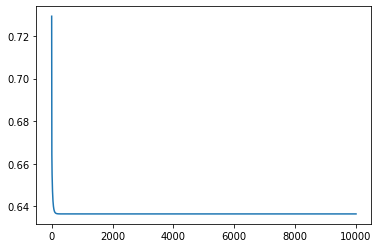

In [15]:
loss_arr = []
for step in range(10000):
    optimizier.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis,Y)
    cost.backward()
    optimizier.step()
    loss_arr.append(cost.item())
    if step % 1000 == 0:
        print(step,cost.item())
plt.plot(loss_arr)

In [16]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis>0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('Hypothesis : ',hypothesis.detach(),'\nCorrect: ',predicted.detach(),'\nAccuracy: ',accuracy.item())

Hypothesis :  tensor([[0.6667],
        [0.3333],
        [0.3333],
        [0.6667],
        [0.6667],
        [0.3333]]) 
Correct:  tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]]) 
Accuracy:  0.6666666865348816


# 12-1

In [2]:
X = torch.FloatTensor([[0,0],[0,1],[1,1],[1,0],[0.5,0.5]])
Y = torch.FloatTensor([[0],[0],[0],[0],[1]]) 

In [3]:
linear = nn.Linear(2,2,bias=True)
linear2 = nn.Linear(2,1,bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear,sigmoid,linear2,sigmoid)
criterion = nn.BCELoss() # Binary Cross Entropy
optimizier = torch.optim.SGD(model.parameters(),lr = 0.5)

0 0.6084851026535034
1000 0.5003818273544312
2000 0.5001996755599976
3000 0.49721384048461914
4000 0.4321187436580658
5000 0.05648207664489746
6000 0.01654590293765068
7000 0.00930034276098013
8000 0.006401821970939636
9000 0.0048596421256661415


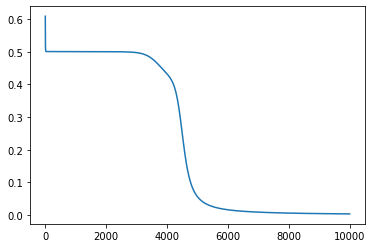

In [4]:
loss_arr = []
for step in range(10000):
    optimizier.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis,Y)
    cost.backward()
    optimizier.step()
    loss_arr.append(cost.item())
    if step % 1000 == 0:
        print(step,cost.item())
plt.plot(loss_arr)

In [5]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis>0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('Hypothesis : ',hypothesis.detach(),'\nCorrect: ',predicted.detach(),'\nAccuracy: ',accuracy.item())

Hypothesis :  tensor([[0.0022],
        [0.0019],
        [0.0037],
        [0.0028],
        [0.9912]]) 
Correct:  tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]]) 
Accuracy:  1.0
